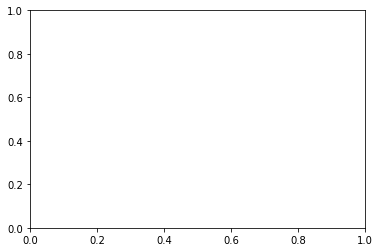

In [6]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import lognorm
fig, ax=plt.subplots(1,1)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'x')

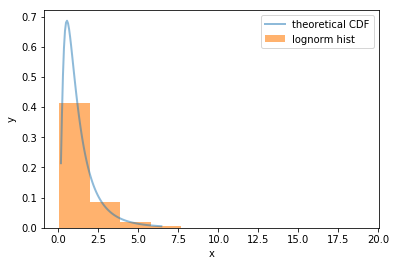

In [7]:
s=0.8

# теоретическая плотность распределения
x = np.linspace(lognorm.ppf(0.01,s),lognorm.ppf(0.99,s),100)
plt.plot(x, lognorm.pdf(x, s), lw=2, alpha=0.5, label='theoretical CDF')

# случайная выборка объема 1000
r=lognorm.rvs(s,size=1000)

# гистограмма выборки
plt.hist(r, normed=True, alpha=0.6, label='lognorm hist')
plt.legend()
plt.ylabel('y')
plt.xlabel('x')

Ex= 1.3771277643359572 STD= 1.3039013943793185 DX= 1.7001588462643311
мат. ожидание= 1.3771277643359572
дисперсия= 0.5831224307577837


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


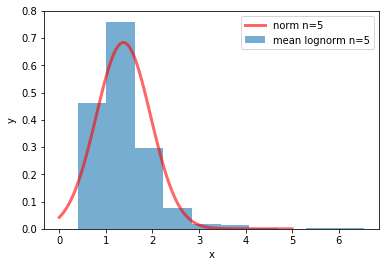

In [10]:
# функция для построения гистограммы распределений выборочных средних 
def lognormF(sizeSample,ex, dx):
    n=sizeSample
    val=np.array([lognorm.rvs(s, size=n) for x in range(1000)])
    meanVal=val.mean(axis = 1)
    plt.hist(meanVal, normed = True, alpha=0.6, label='mean lognorm n=' + str(n))
    
    # мат. ожидание и дисперсия нормального распределения
    m=ex
    sig=math.sqrt(dx/n)
    print ('мат. ожидание=', m)
    print ('дисперсия=', sig)
    
    # нормальное распределение
    norm=sts.norm(loc=m, scale=sig)
    x=np.linspace(0, 5, 100)
    pdf = norm.pdf(x)
    plt.plot(x, pdf, 'r-', lw=3, alpha=0.6, label='norm n=' +str(n))
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend()

# теоретические мат. ожидания и дисперсия распределения Lognorm
ex = lognorm.mean(s)
std = lognorm.std(s)
dx = std**2
print ('Ex=', ex, 'STD=', std, 'DX=', dx)

# гистограмма для п=5
lognormF(5, ex, dx)

мат. ожидание= 1.3771277643359572
дисперсия= 0.18439950359284218


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


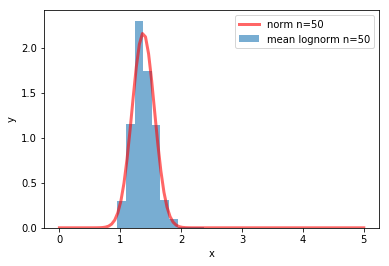

In [11]:
# гистограмма для п=50
lognormF(50, ex, dx)

мат. ожидание= 1.3771277643359572
дисперсия= 0.13039013943793185


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


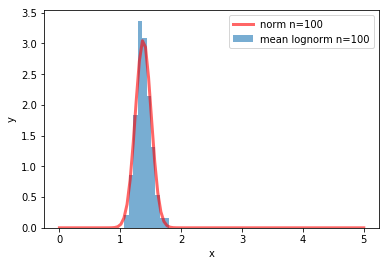

In [12]:
# гистограмма для п=100
lognormF(100, ex, dx)

## Вывод
1. распределение выборочных средних фунции lognorm для выборки с достаточно большим объемом хорошо описывается нормальным распределеним
2. с ростом n точность аппроксимации увеличивается